In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
df = pd.read_csv('train.csv',delimiter=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()
df.describe()
df['Survived'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Survived
0    549
1    342
Name: count, dtype: int64

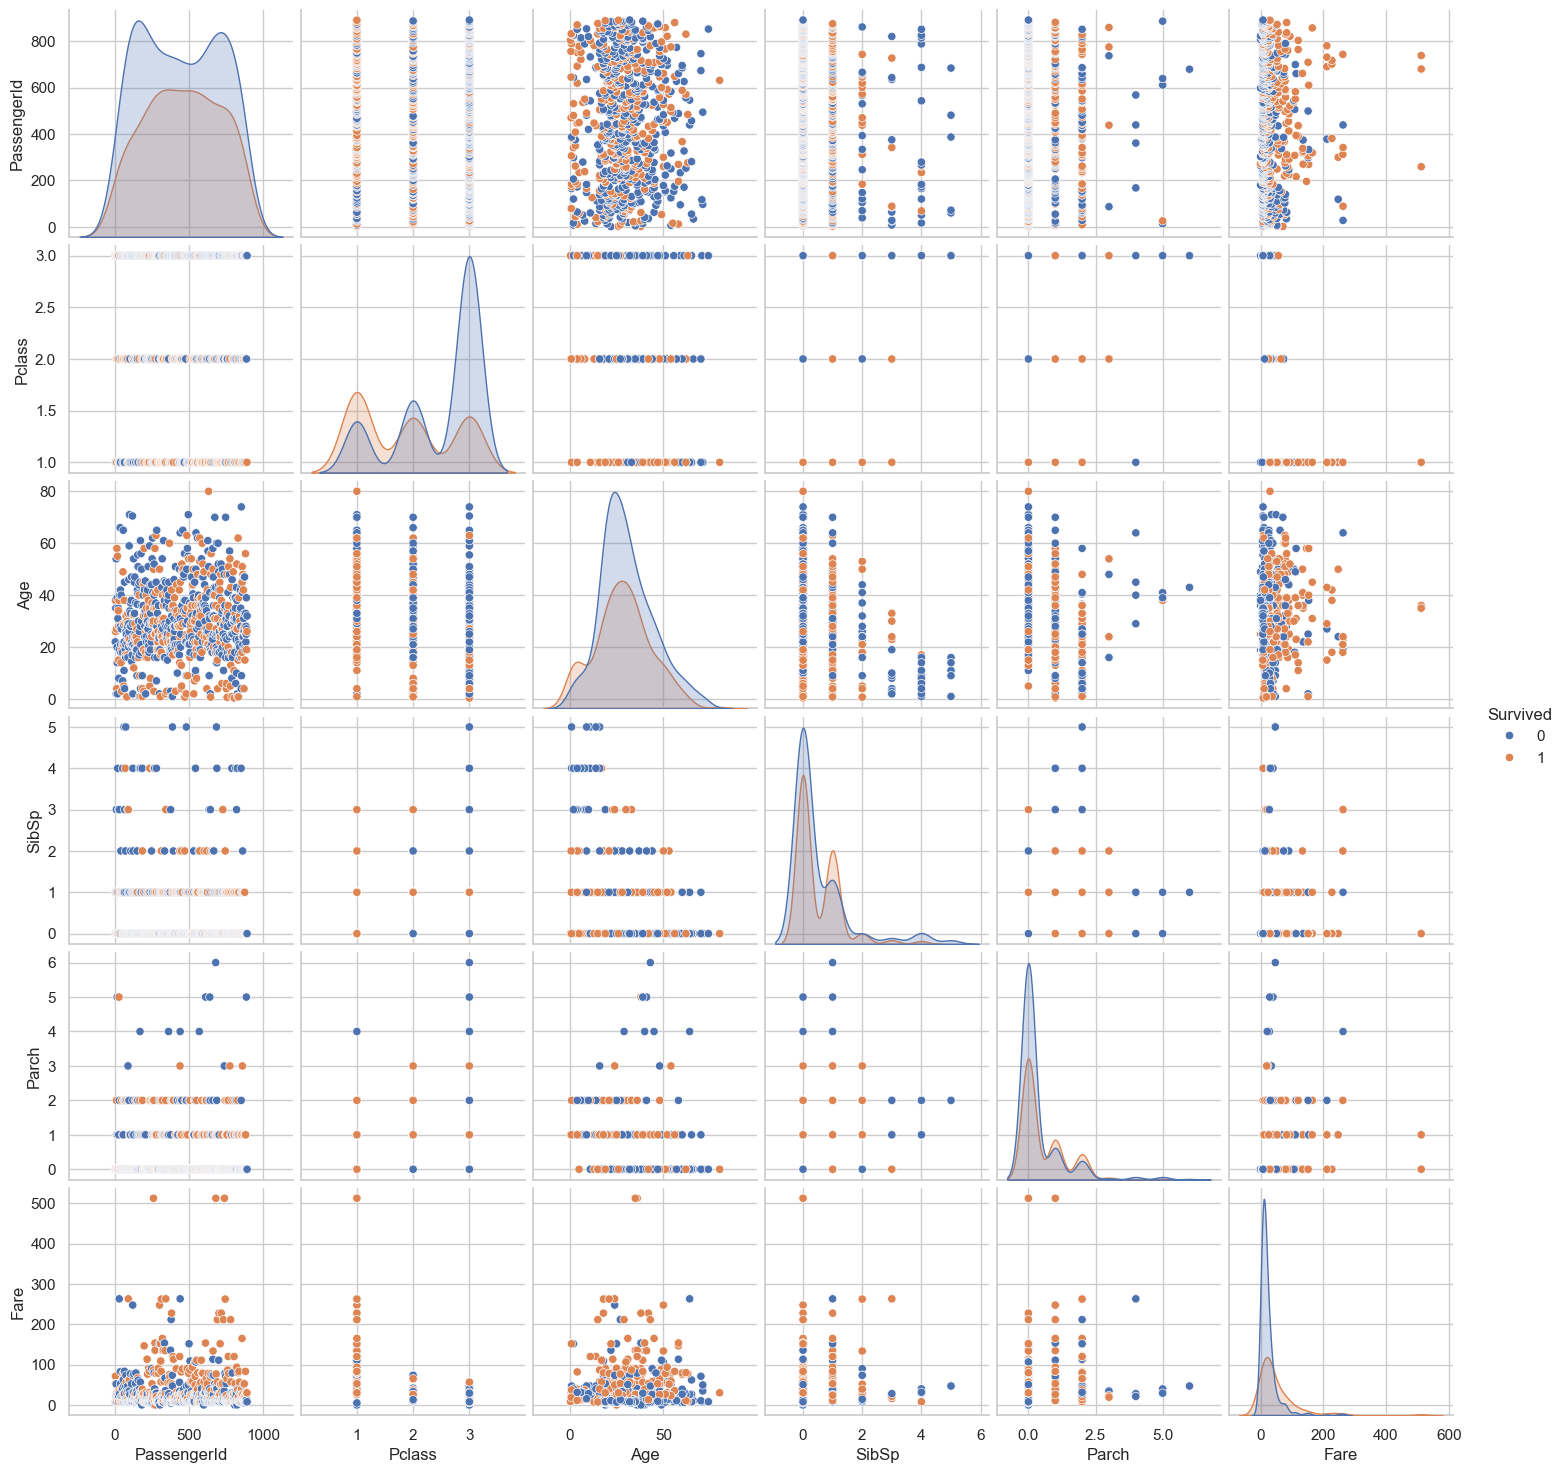

In [9]:
sns.pairplot(df.dropna(subset=['Age', 'Fare']), hue='Survived')

<Axes: >

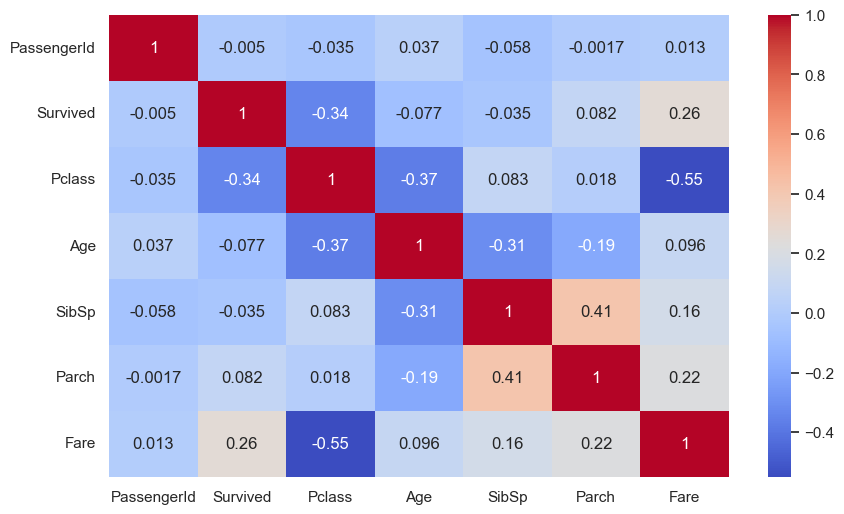

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

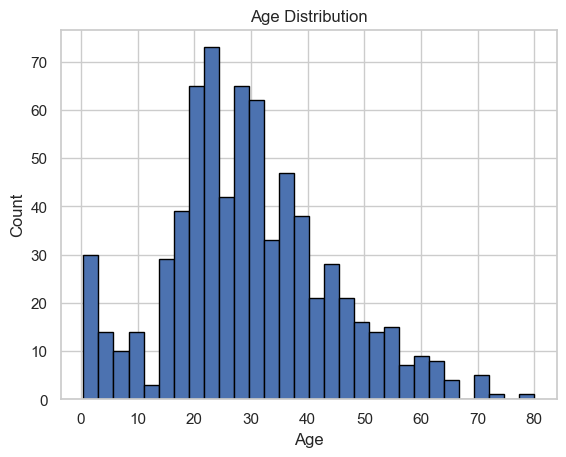

In [13]:
df['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Age vs Survival')

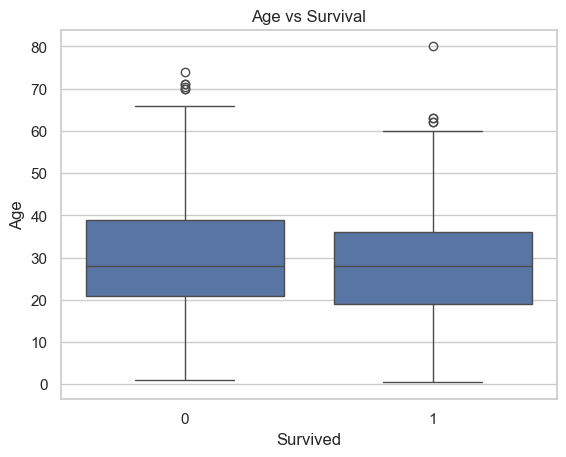

In [14]:
# Boxplot of age by survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')

Text(0.5, 1.0, 'Fare vs Age by Survival')

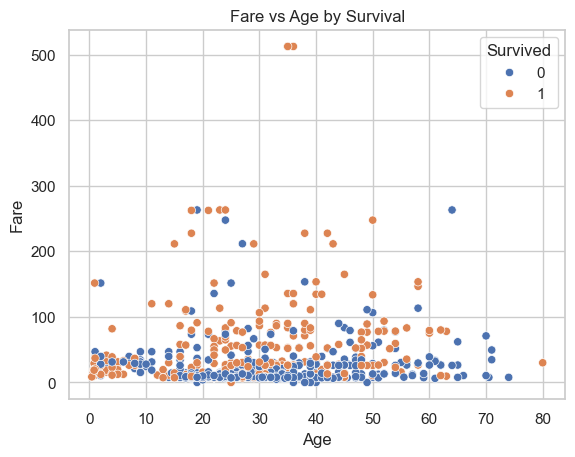

In [16]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Fare vs Age by Survival')

INSIGHTS ->

1. Younger passengers, especially children, had a higher survival rate (more orange dots for Survived = 1).
 A significant number of older passengers did not survive (blue dots dominate higher age ranges).

2. Passengers who paid higher fares were more likely to survive.
This suggests that wealthier passengers (likely in 1st class) had better access to lifeboats or assistance.

3. 1st class passengers had a higher survival rate.
  3rd class passengers had the lowest survival, indicated by many blue points.
  This aligns with the socioeconomic disparities in safety during the disaster.

4. Passengers with small families (SibSp or Parch = 1–2) had better survival chances.
   Large families (values > 3) tended to have lower survival rates, possibly due to difficulty evacuating as a group.

5. The cluster in Fare vs Pclass shows distinct groupings: Pclass 1 with high fares, and Pclass 3 with low fares.
   These clusters align with survival likelihood.



